In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
filtered_data=pd.read_pickle('./filtered_data.pkl')

In [10]:
filtered_data=pd.concat(frames)
filtered_data=df[df.columns[df.columns.isin(['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_NAME'
                                           ,'FULL_TIME_POSITION','H1B_DEPENDENT'])]]

In [35]:
filtered_data.head(3)

,AGENT_REPRESENTING_EMPLOYER,CASE_STATUS,EMPLOYER_CITY,EMPLOYER_NAME,EMPLOYER_STATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,SOC_NAME,VISA_CLASS
0,Y,0,RIVERWOODS,DISCOVER_PRODUCTS_INC,IL,Y,N,ASSOCIATE_DATA_INTEGRATION,COMPUTER_SYSTEMS_ANALYSTS,H1B
1,Y,0,RIVERWOODS,DFS_SERVICES_LLC,IL,Y,N,SENIOR_ASSOCIATE,OPERATIONS_RESEARCH_ANALYSTS,H1B
2,Y,0,WASHINGTON,EASTBANC_TECHNOLOGIES_LLC,DC,Y,Y,NET_SOFTWARE_PROGRAMMER,COMPUTER_PROGRAMMERS,H1B


In [18]:
filtered_data.shape

(1157902, 10)

Replacing all spaces with '_'

In [20]:
filtered_data= filtered_data.replace(to_replace=' ', value='_',regex=True)
filtered_data= filtered_data.replace(to_replace='[^a-zA-Z0-9_\n]', value='',regex=True)


In [21]:
unique_cases = filtered_data['CASE_STATUS'].value_counts()

In [22]:
unique_cases

1    1019945
0     137957
Name: CASE_STATUS, dtype: int64

In [23]:
def change_casestatus_type(x):
    if x=='DENIED':
        return 0
    elif x==1:
        return 1
    else:
        return 0
    
actualScore = filtered_data['CASE_STATUS']
positiveNegative = actualScore.map(change_casestatus_type) 
#filtered_data['CASE_STATUS'] = positiveNegative
#print("Number of data points in our data", filtered_data.shape)


Dropping all rows whose values are NAN(not a number)

In [24]:
filtered_data=filtered_data.dropna() 

In [25]:
filtered_data['CASE_STATUS'].value_counts()

1    1019945
0     137957
Name: CASE_STATUS, dtype: int64

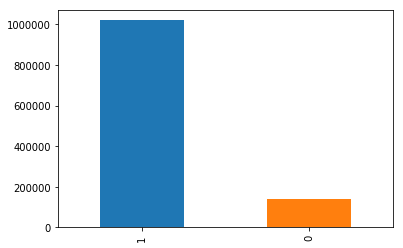

In [26]:
filtered_data['CASE_STATUS'].value_counts().plot(kind='bar')

<h7>About 89 percent points are towards 1 <br> Therefore model will be baised towards Accepted</h7>

# Preprocessing

In [27]:
result=filtered_data

In [28]:
print('No of features are:',list(result.head(0)))

No of features are: ['AGENT_REPRESENTING_EMPLOYER', 'CASE_STATUS', 'EMPLOYER_CITY', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'FULL_TIME_POSITION', 'H1B_DEPENDENT', 'JOB_TITLE', 'SOC_NAME', 'VISA_CLASS']


In [29]:
X_1=result[result['CASE_STATUS']==1].sample(n=250000)
X_0=result[result['CASE_STATUS']==0]

In [30]:
frames=[X_1,X_0]

In [31]:
X_0.shape

(137957, 10)

In [32]:
result=pd.concat(frames)

In [36]:
result.shape

(387957, 10)

In [126]:
#result.to_pickle("./downsampled.pkl")

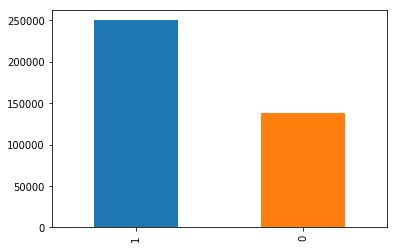

In [37]:
result['CASE_STATUS'].value_counts().plot(kind='bar')

<h3>Preprocssing for AGENT_REPRESENTING_EMPLOYER</h3>

In [38]:
unique_cases = result['AGENT_REPRESENTING_EMPLOYER'].value_counts()
print('No of unique values are ',unique_cases)

No of unique values are  Y    256745
N    131212
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64


As we can see there are two possible features for this feature Y and N we convert it into 1 or 0

In [42]:
def AGENT_REPRESENTING_EMPLOYER_type(x):
    if x=='Y':
        return 1
    elif x=='N':
        return 0
    elif x=='1':
        return 1
    else: 
        return 0
    
        
        
    
actualScore = result['AGENT_REPRESENTING_EMPLOYER']
positiveNegative = actualScore.map(AGENT_REPRESENTING_EMPLOYER_type) 
#result['AGENT_REPRESENTING_EMPLOYER'] = positiveNegative
#unique_cases = result['AGENT_REPRESENTING_EMPLOYER'].value_counts()
#print('No of unique values are ',unique_cases)


In [43]:
AGENT_REPRESENTING_EMPLOYER_scores=np.array(positiveNegative).reshape(-1,1)
AGENT_REPRESENTING_EMPLOYER_scores.shape

(387957, 1)

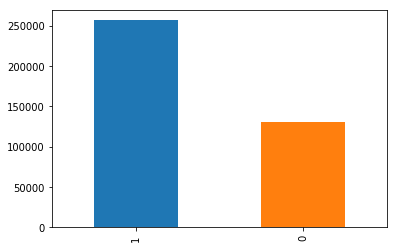

In [44]:
result['AGENT_REPRESENTING_EMPLOYER'].value_counts().plot(kind='bar')

<h3>Preprocssing for EMPLOYER_CITY</h3>

In [45]:
unique_cases = result['EMPLOYER_CITY'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(10))

No of unique values are  4483
NEW_YORK         18692
CHICAGO          13273
PLANO            12502
PHILADELPHIA      8555
DURHAM            7720
MOUNTAIN_VIEW     7466
EDISON            7342
SAN_FRANCISCO     7223
ROCKVILLE         7000
HOUSTON           6642
Name: EMPLOYER_CITY, dtype: int64


As we can see there 6332 possible values for Cities therefore we will perform one hot encoding on it which will convert cities into 6332 dimensions vector 

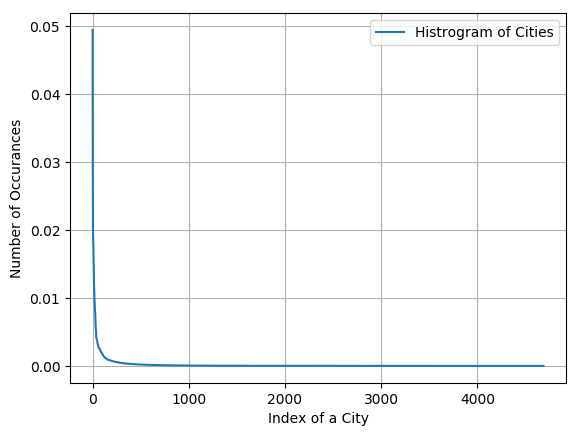

In [132]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of Cities")
plt.xlabel('Index of a City')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

In [46]:
# one-hot encoding of City feature.
city_vectorizer = CountVectorizer(min_df=10)
X_city_feature_onehotCoding = city_vectorizer.fit_transform(result['EMPLOYER_CITY'])

In [47]:
X_city_feature_onehotCoding.shape

(387957, 1458)

<h3>Preprocssing for EMPLOYER_NAME</h3>

In [48]:
unique_cases = result['EMPLOYER_NAME'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(10))

No of unique values are  51538
INFOSYS_LIMITED                           6954
TATA_CONSULTANCY_SERVICES_LIMITED         6382
DELOITTE_CONSULTING_LLP                   5666
CAPGEMINI_AMERICA_INC                     4726
IBM_INDIA_PRIVATE_LIMITED                 4196
COGNIZANT_TECHNOLOGY_SOLUTIONS_US_CORP    3421
ACCENTURE_LLP                             3159
IBM_CORPORATION                           3146
WIPRO_LIMITED                             3095
TECH_MAHINDRA_AMERICASINC                 3029
Name: EMPLOYER_NAME, dtype: int64


As we can see there 89960 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 89960 dimensions vector 

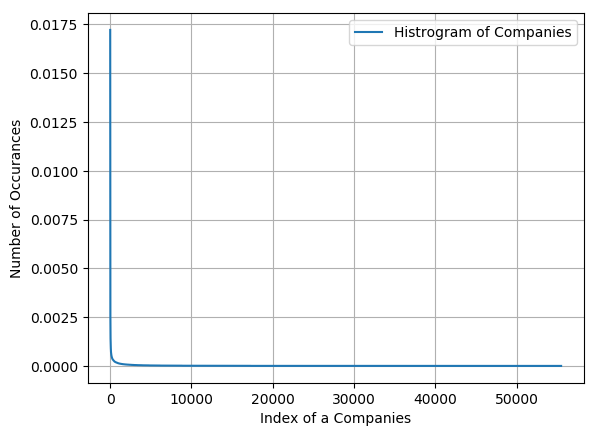

In [136]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of Companies")
plt.xlabel('Index of a Companies')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

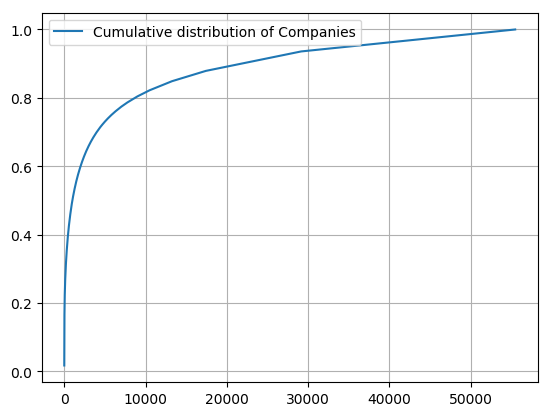

In [137]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Companies')
plt.grid()
plt.legend()
plt.show()

In [49]:
# one-hot encoding of Gene feature.
employer_vectorizer = CountVectorizer(min_df=5)
X_employer_feature_onehotCoding = employer_vectorizer.fit_transform(result['EMPLOYER_NAME'])

In [50]:
X_employer_feature_onehotCoding.shape

(387957, 9660)

<h3>Preprocssing for EMPLOYER_STATE

In [51]:
unique_cases = filtered_data['EMPLOYER_STATE'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(25))

No of unique values are  56
CA    197576
TX    153588
NJ    147252
NY     77141
IL     73021
PA     56287
MI     49293
MA     44045
MD     40347
WA     36632
VA     35692
FL     34837
NC     33298
GA     31458
OH     17159
CT     11108
MO     10571
MN      9270
TN      9123
AZ      7979
CO      7164
WI      6934
IN      6094
AR      4805
DE      4589
Name: EMPLOYER_STATE, dtype: int64


As we can see there 56 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 56 dimensions vector 

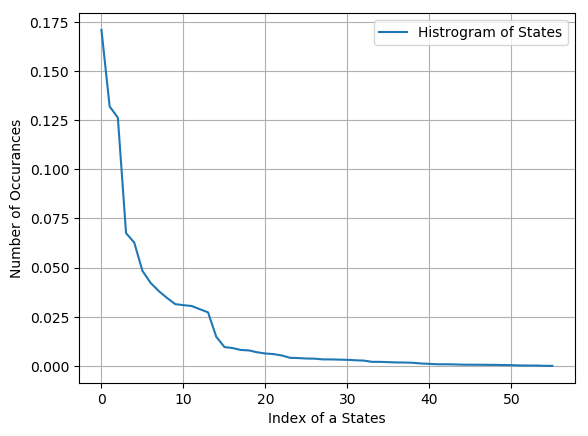

In [141]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of States")
plt.xlabel('Index of a States')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

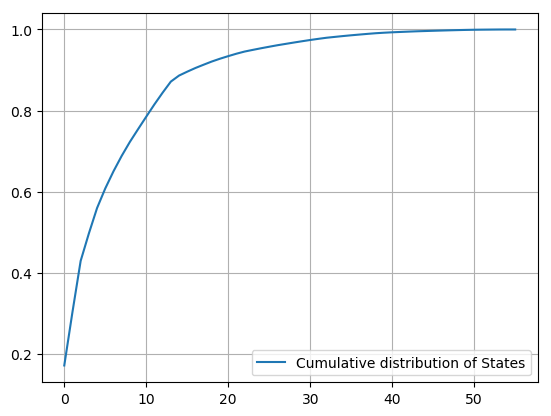

In [142]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of States')
plt.grid()
plt.legend()
plt.show()

In [52]:
# one-hot encoding of Gene feature.
state_vectorizer = CountVectorizer()
X_states_feature_onehotCoding = state_vectorizer.fit_transform(result['EMPLOYER_STATE'])

In [53]:
X_states_feature_onehotCoding.shape

(387957, 56)

<h3>Preprocssing for FULL_TIME_POSITION

In [54]:
unique_cases = result['FULL_TIME_POSITION'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(25))

No of unique values are  2
Y    379785
N      8172
Name: FULL_TIME_POSITION, dtype: int64


As we can see there 2 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 98740 dimensions vector 

In [55]:
def FULL_TIME_POSITION_type(x):
    if x=='Y':
        return 1
    else:
        return 0
    
actualScore = result['FULL_TIME_POSITION']
positiveNegative = actualScore.map(FULL_TIME_POSITION_type) 
#result['FULL_TIME_POSITION'] = positiveNegative
#unique_cases = result['FULL_TIME_POSITION'].value_counts()
#print('No of unique values are ',unique_cases)


In [56]:
FULL_TIME_POSITION_scores=np.array(positiveNegative).reshape(-1,1)

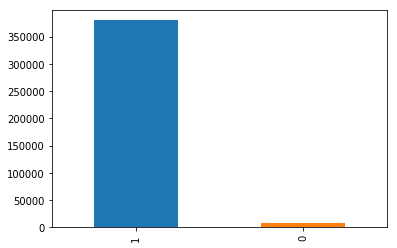

In [57]:
result['FULL_TIME_POSITION'].value_counts().plot(kind='bar')

<h3>Preprocssing for H1B_DEPENDENT

In [58]:
unique_cases = result['H1B_DEPENDENT'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(25))

No of unique values are  2
N    251902
Y    136055
Name: H1B_DEPENDENT, dtype: int64


As we can see there 2 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 98740 dimensions vector 

In [59]:
def H1B_DEPENDENT_type(x):
    if x=='Y':
        return 1
    elif x=='N':
        return 0
    elif x=='1':
        return 1
    else: 
        return 0
    
actualScore = result['H1B_DEPENDENT']
positiveNegative_H1B_DEPENDENT = actualScore.map(H1B_DEPENDENT_type) 
result['H1B_DEPENDENT'] = positiveNegative
#unique_cases = result['H1B_DEPENDENT'].value_counts()
#print('No of unique values are ',unique_cases)


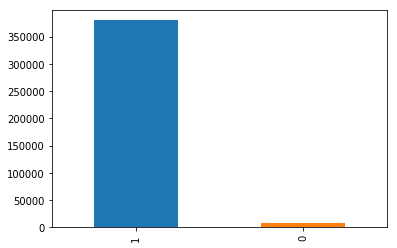

In [60]:
result['H1B_DEPENDENT'].value_counts().plot(kind='bar')

In [61]:
H1B_DEPENDENT_scores=np.array(positiveNegative_H1B_DEPENDENT).reshape(-1,1)

In [62]:
H1B_DEPENDENT_scores.shape

(387957, 1)

<h3>Preprocssing for JOB_TITLE

In [63]:
unique_cases = filtered_data['JOB_TITLE'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(25))

No of unique values are  149088
PROGRAMMER_ANALYST             55556
SOFTWARE_ENGINEER              55197
SOFTWARE_DEVELOPER             48257
SYSTEMS_ANALYST                15005
SENIOR_SOFTWARE_ENGINEER       13812
BUSINESS_ANALYST               11522
DEVELOPER                      11002
COMPUTER_PROGRAMMER             9631
ASSISTANT_PROFESSOR             9217
CONSULTANT                      9096
COMPUTER_SYSTEMS_ANALYST        8929
ANALYST                         7502
SENIOR_SYSTEMS_ANALYST_JC60     7434
SENIOR_CONSULTANT               7326
PROJECT_MANAGER                 7284
ASSOCIATE                       6248
JAVA_DEVELOPER                  5628
DATABASE_ADMINISTRATOR          5569
DEVELOPER_USER_INTERFACE        5526
SENIOR_SOFTWARE_DEVELOPER       5480
APPLICATION_DEVELOPER           5055
PHYSICAL_THERAPIST              4851
TECHNOLOGY_LEAD__US             4495
ACCOUNTANT                      4333
SYSTEMS_ENGINEER                3934
Name: JOB_TITLE, dtype: int64


As we can see there 98740 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 98740 dimensions vector 

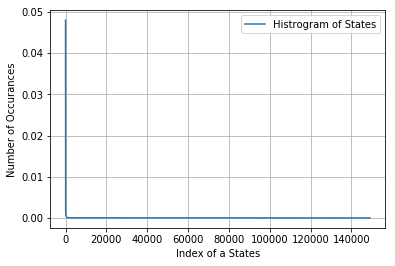

In [64]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of States")
plt.xlabel('Index of a States')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

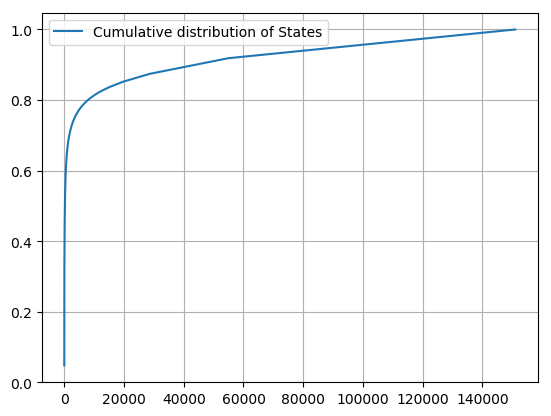

In [155]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of States')
plt.grid()
plt.legend()
plt.show()

In [65]:
# one-hot encoding of Gene feature.
job_title_vectorizer = CountVectorizer(min_df=50)
X_JOB_TITLE_feature_onehotCoding = job_title_vectorizer.fit_transform(result['JOB_TITLE'])

In [67]:
X_JOB_TITLE_feature_onehotCoding.shape

(387957, 696)

<h3>Preprocssing for SOC_NAME

In [158]:
unique_cases = filtered_data['SOC_NAME'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(50))

No of unique values are  1081
SOFTWARE_DEVELOPERS_APPLICATIONS                      297158
COMPUTER_SYSTEMS_ANALYSTS                             138147
COMPUTER_OCCUPATIONS_ALL_OTHER                        104920
COMPUTER_PROGRAMMERS                                   88526
SOFTWARE_DEVELOPERS_SYSTEMS_SOFTWARE                   42696
COMPUTER_SYSTEMS_ANALYST                               28309
MANAGEMENT_ANALYSTS                                    23600
ACCOUNTANTS_AND_AUDITORS                               21597
OPERATIONS_RESEARCH_ANALYSTS                           21438
MECHANICAL_ENGINEERS                                   19635
NETWORK_AND_COMPUTER_SYSTEMS_ADMINISTRATORS            19227
FINANCIAL_ANALYSTS                                     18082
DATABASE_ADMINISTRATORS                                16740
COMPUTER_AND_INFORMATION_SYSTEMS_MANAGERS              13588
MARKET_RESEARCH_ANALYSTS_AND_MARKETING_SPECIALISTS     13496
ELECTRICAL_ENGINEERS                                   

As we can see there 98740 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 98740 dimensions vector 

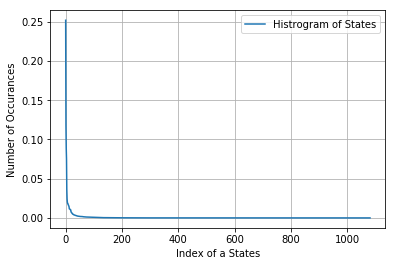

In [55]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of States")
plt.xlabel('Index of a States')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

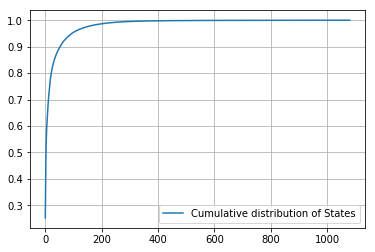

In [56]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of States')
plt.grid()
plt.legend()
plt.show()

In [55]:
# one-hot encoding of Gene feature.
socname_vectorizer = CountVectorizer(min_df=60)
X_SOC_NAME_feature_onehotCoding = socname_vectorizer.fit_transform(result['SOC_NAME'])

In [56]:
X_SOC_NAME_feature_onehotCoding.shape

(409901, 222)

<h3>Preprocssing for VISA_CLASS

In [161]:
unique_cases = filtered_data['VISA_CLASS'].value_counts()
print('No of unique values are ',unique_cases.size)
print(unique_cases.head(25))

No of unique values are  4
H1B               1176114
E3_Australian        3196
H1B1_Chile            305
H1B1_Singapore        231
Name: VISA_CLASS, dtype: int64


As we can see there 98740 possible values for Cities therefore we will perform one hot encoding on it which will convert Companies into 98740 dimensions vector 

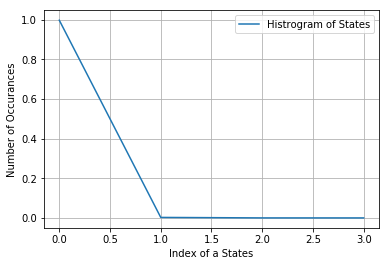

In [60]:
s = sum(unique_cases.values);
h = unique_cases.values/s;
plt.plot(h, label="Histrogram of States")
plt.xlabel('Index of a States')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

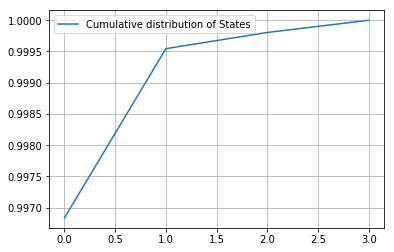

In [61]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of States')
plt.grid()
plt.legend()
plt.show()

In [57]:
# one-hot encoding of Gene feature.
visaclass_vectorizer = CountVectorizer()
X_VISA_CLASS_feature_onehotCoding = visaclass_vectorizer.fit_transform(result['VISA_CLASS'])

In [58]:
X_VISA_CLASS_feature_onehotCoding.shape

(409901, 4)

In [164]:
X_JOB_TITLE_feature_onehotCoding.shape

(409901, 741)

# Train Test and CV split

In [178]:
Y=result['CASE_STATUS'].values
X=hstack((X_JOB_TITLE_feature_onehotCoding,X_SOC_NAME_feature_onehotCoding
          ,X_employer_feature_onehotCoding,X_states_feature_onehotCoding,AGENT_REPRESENTING_EMPLOYER_scores,H1B_DEPENDENT_scores))

In [179]:
print(X.shape)
print(Y.shape)

(409901, 11369)
(409901,)


In [180]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase): this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)


(262336, 11369) (262336,)
(65584, 11369) (65584,)
(81981, 11369) (81981,)


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

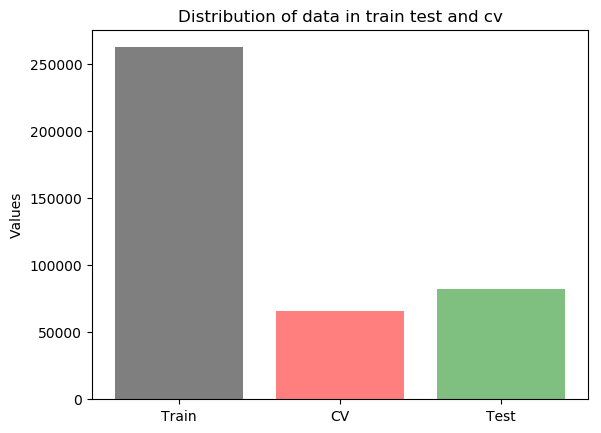

In [181]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Train', 'CV', 'Test')
y_pos = np.arange(len(objects))
size = [y_train.shape[0],y_cv.shape[0],y_test.shape[0]]

plt.bar(y_pos, size, align='center', alpha=0.5, color=['black', 'red', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Distribution of data in train test and cv')
plt.show()


In [182]:
import collections
print('Train',collections.Counter(y_train))
print('CV',collections.Counter(y_cv))
print('Test',collections.Counter(y_test))


Train Counter({1: 160189, 0: 102147})
CV Counter({1: 39753, 0: 25831})
Test Counter({1: 50058, 0: 31923})


In [183]:
train_list=list(y_train)
test_list=list(y_test)
cv_list=list(y_cv)


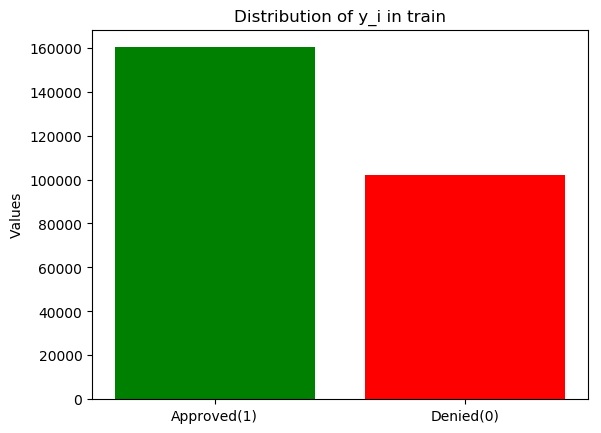

In [184]:
objects = ('Approved(1)', 'Denied(0)')
y_pos = np.arange(len(objects))
size = [train_list.count(1),train_list.count(0)]

plt.bar(y_pos, size, color=['green', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Distribution of y_i in train')
plt.show()


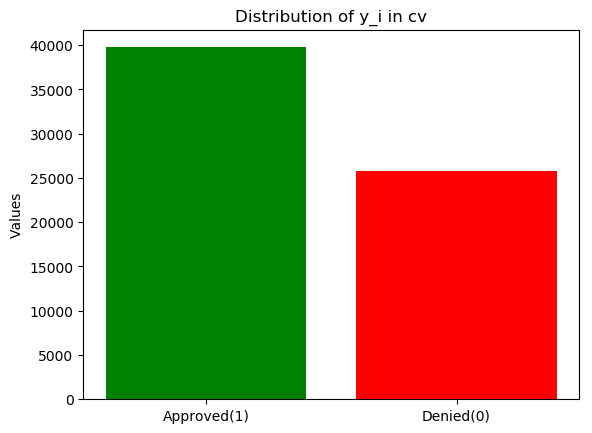

In [185]:
objects = ('Approved(1)', 'Denied(0)')
y_pos = np.arange(len(objects))
size = [cv_list.count(1),cv_list.count(0)]

plt.bar(y_pos, size, color=['green', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Distribution of y_i in cv')
plt.show()

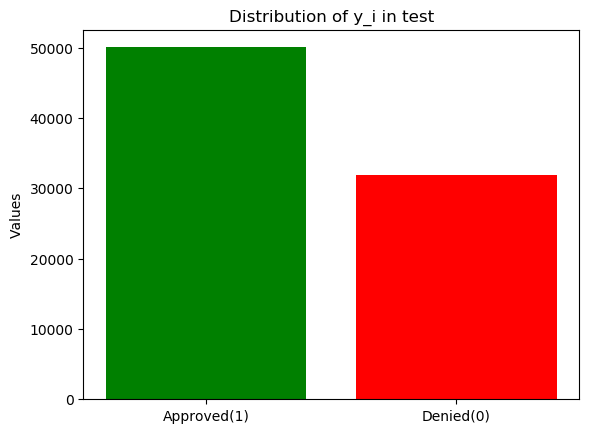

In [186]:
objects = ('Approved(1)', 'Denied(0)')
y_pos = np.arange(len(objects))
size = [test_list.count(1),test_list.count(0)]

plt.bar(y_pos, size, color=['green', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Values')
plt.title('Distribution of y_i in test')
plt.show()

<h3>Observation:</h3><br>1)Data is unformly distributed in all the cases<br>
            2)Data is unbalanced

<h2>Predicition using Random Model</h2>

In [187]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [188]:
pred=dummy.predict(X_test)

Wall time: 152 ms


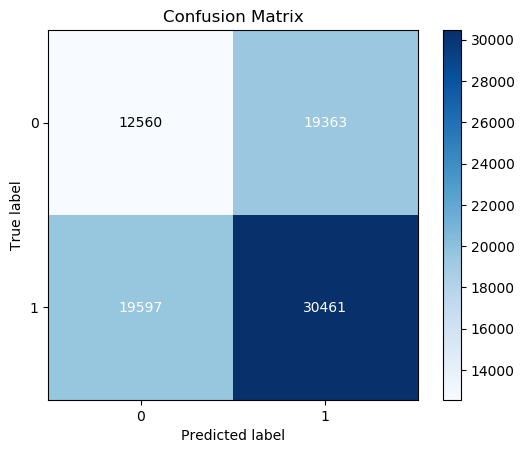

In [189]:
%%time
import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#s.download('PorterStemmer').
skplt.plot_confusion_matrix(y_test ,pred)

In [190]:
print(classification_report(y_test ,pred))

             precision    recall  f1-score   support

          0       0.39      0.39      0.39     31923
          1       0.61      0.61      0.61     50058

avg / total       0.53      0.52      0.53     81981



<h2>Prediction using base line model

<h3>1. Navie Bayes

<h6>Hyper Parameter tuning

In [191]:
from sklearn.cross_validation import cross_val_score
from tqdm import tqdm
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
def find_optimal_alpha(X_tr,y_tr, myList):
   
    alpha_values = myList

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for a in tqdm(alpha_values):
        ber_nav_bayes= BernoulliNB(alpha=a)
        scores = cross_val_score(ber_nav_bayes, X_tr, y_tr, cv=10, scoring='accuracy') * float(100)
        cv_scores.append(scores.mean())
        
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number for alpha is %d.' % optimal_alpha)


    plt.figure(figsize=(10,6))
    plt.plot((myList),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. alpha Value')
    plt.xlabel('alpha')
    plt.ylabel('Error Rate')

    print("the misclassification error for each alpha value is : ", np.round(MSE,3))
    
    return optimal_alpha

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [05:02<00:00,  5.21s/it]



The optimal number for alpha is 14.
the misclassification error for each alpha value is :  [-83.248 -83.358 -83.501 -83.726 -83.919 -84.073 -84.306 -84.493 -84.662
 -84.784 -84.927 -85.049 -85.161 -85.26  -85.336 -85.363 -85.408 -85.471
 -85.52  -85.56  -85.589 -85.617 -85.632 -85.648 -85.648 -85.647 -85.647
 -85.653 -85.656 -85.652 -85.655 -85.651 -85.638 -85.639 -85.639 -85.635
 -85.634 -85.631 -85.629 -85.623 -85.618 -85.613 -85.607 -85.601 -85.591
 -85.583 -85.577 -85.568 -85.562 -85.557 -85.553 -85.548 -85.541 -85.533
 -85.528 -85.525 -85.523 -85.518 -85.511 -85.507]
Wall time: 5min 2s


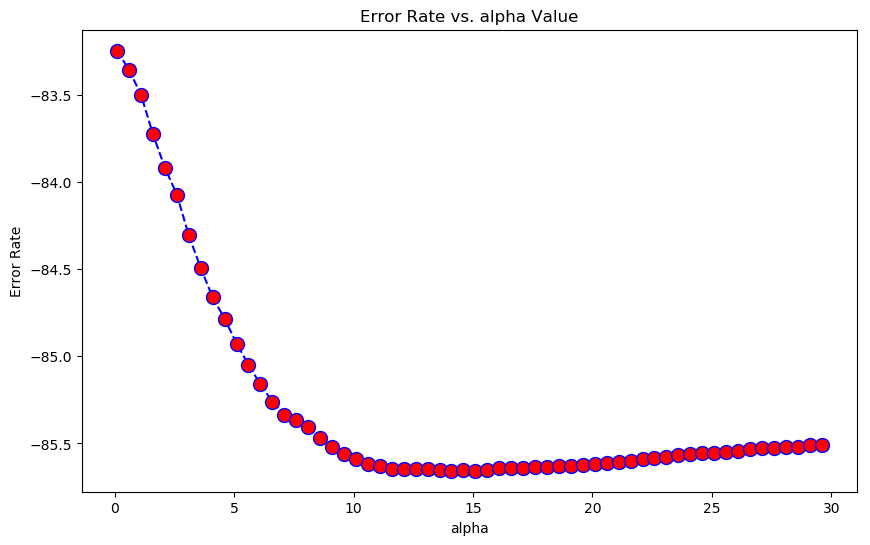

In [70]:
%%time
myList = np.arange(0.1,25,0.5)

optimal_k = find_optimal_alpha(X_train,y_train,myList)

<h4>As we can see the loss for Alpha=14 was minimal <br>
Therefore we choose 14 to be optimal</h4>

In [192]:
%%time
ber_nav_bayes= BernoulliNB(alpha=14)
ber_nav_bayes.fit(X_train, y_train)
pred = ber_nav_bayes.predict(X_cv)

Wall time: 212 ms


Wall time: 132 ms


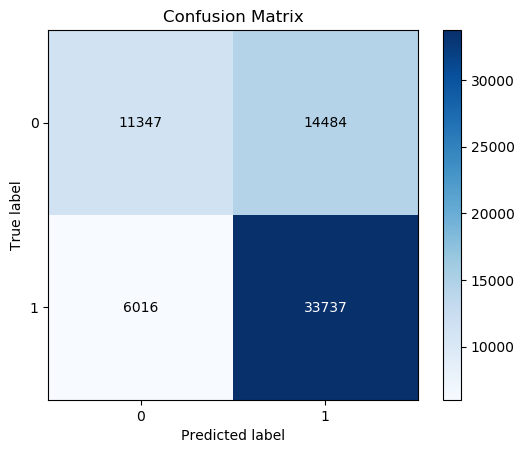

In [193]:
%%time
skplt.plot_confusion_matrix(y_cv ,pred)

In [194]:
print(classification_report(y_cv ,pred))

             precision    recall  f1-score   support

          0       0.65      0.44      0.53     25831
          1       0.70      0.85      0.77     39753

avg / total       0.68      0.69      0.67     65584



<h6>Because the data is imbalanced(almost 89% data is towards 1)<br>
Therefore predicting correct Dinied class values is difficult</h6>

<h7>Prediciting correctly classified point with probablities

In [74]:
test_point_index = 1
no_feature = 100
predicted_cls = ber_nav_bayes.predict(X_cv[17])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(ber_nav_bayes.predict_proba(X_cv[17]),4))
print("Actual Class :", y_cv[17])

Predicted Class : 1
Predicted Class Probabilities: [[0.0037 0.9963]]
Actual Class : 1


<h7>Prediciting incorrectly classified point with probablities

In [75]:
# Get the index of elements with value 0
result = np.where(y_cv == 0)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

Tuple of arrays returned :  (array([     5,     34,     35, ..., 188747, 188759, 188769], dtype=int64),)
Elements with value 15 exists at following indices
[     5     34     35 ... 188747 188759 188769]


In [76]:
test_point_index = 1
no_feature = 100
predicted_cls = ber_nav_bayes.predict(X_cv[5])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(ber_nav_bayes.predict_proba(X_cv[5]),4))
print("Actual Class :", y_cv[5])

Predicted Class : 1
Predicted Class Probabilities: [[0.0027 0.9973]]
Actual Class : 0


<h6>Because predicting correct Dinied class values was difficult<br>We take weighted priorites ie give more priority to 0</h6>

In [203]:
%%time
ber_nav_bayes= BernoulliNB(alpha=10,class_prior=[0.52,0.48])
ber_nav_bayes.fit(X_train, y_train)
pred = ber_nav_bayes.predict(X_cv)

Wall time: 140 ms


In [204]:
print(log_loss(y_cv,pred))

11.295881523407099


Wall time: 188 ms


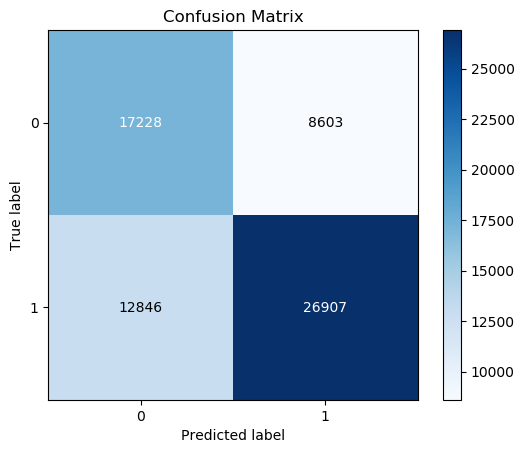

In [205]:
%%time
skplt.plot_confusion_matrix(y_cv ,pred)

In [206]:
print(classification_report(y_cv ,pred))

             precision    recall  f1-score   support

          0       0.57      0.67      0.62     25831
          1       0.76      0.68      0.72     39753

avg / total       0.68      0.67      0.68     65584



<h7>Prediciting correctly classified point with probablities

In [ ]:
test_point_index = 1
no_feature = 100
predicted_cls = ber_nav_bayes.predict(X_cv[1])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(ber_nav_bayes.predict_proba(X_cv[1]),4))
print("Actual Class :", y_cv[1])

<h7>Prediciting incorrectly classified point with probablities

In [ ]:
# Get the index of elements with value 0
result = np.where(y_cv == 0)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

In [ ]:
test_point_index = 1
no_feature = 100
predicted_cls = ber_nav_bayes.predict(X_cv[46])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(ber_nav_bayes.predict_proba(X_cv[46]),4))
print("Actual Class :", y_cv[46])

<h5>Observations:<br><br>1.In first case the recall(TN/N) score was miserably low<br>2. Now it has improved reasonably<br>3.Because the data is biased,classifying 0 is challenging

# Classification using Logistic Regression

<h4>Finding optimal Lambda

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score


In [209]:
#tuned_parameters = {'C': [10**-1,10**0,10**1, 10**2]}
#Using GridSearchCV
#model = GridSearchCV(LogisticRegression(n_jobs=4,max_iter=100), tuned_parameters, scoring = 'accuracy', cv=5)
#model.fit(X_train, y_train)
#print(model.best_estimator_)
#print(model.score(X_cv, y_cv))



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.7136954135154916


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8877445820851213

In [241]:
%%time
logistic_reg= LogisticRegression(C=1,n_jobs=4,max_iter=100,class_weight={0:0.55,1:0.45})
logistic_reg.fit(X_train, y_train)
#logistic_reg.score(X_cv, y_cv)
pred = logistic_reg.predict(X_test)

Wall time: 5.39 s


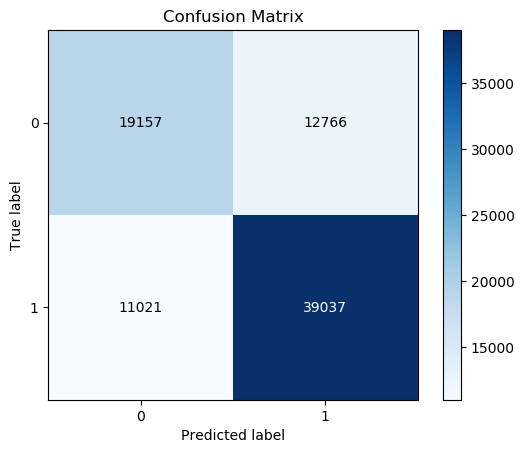

In [242]:
skplt.plot_confusion_matrix(y_test ,pred)

In [243]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.63      0.60      0.62     31923
          1       0.75      0.78      0.77     50058

avg / total       0.71      0.71      0.71     81981



# Artificial Neural Network

In [82]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000,learning_rate='adaptive')
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [83]:
pred=mlp.predict(X_cv)

In [84]:
print(classification_report(y_cv,pred))

             precision    recall  f1-score   support

          0       0.48      0.26      0.33     25556
          1       0.89      0.96      0.92    163220

avg / total       0.84      0.86      0.84    188776



In [86]:
import pickle
MLP_model='MLP_model.sav'
pickle.dump(mlp,open(MLP_model,'wb'))

# Random Forest Classifier

In [244]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 25,n_jobs=-1,class_weight={0:0.55,1:0.45},max_features='auto')
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.55, 1: 0.45},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [252]:
pred=rf.predict(X_cv)

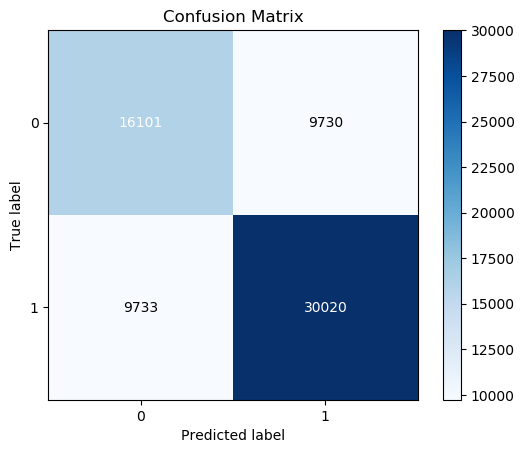

In [253]:
skplt.plot_confusion_matrix(y_cv ,pred)

In [254]:
print(classification_report(y_cv,pred))

             precision    recall  f1-score   support

          0       0.62      0.62      0.62     25831
          1       0.76      0.76      0.76     39753

avg / total       0.70      0.70      0.70     65584



In [255]:
import pickle
RF_model='RF_model_undersample.sav'
pickle.dump(rf,open(RF_model,'wb'))

# Stacking Classifier

In [256]:
lr = LogisticRegression(C=1)
sclf = StackingClassifier(classifiers=[ber_nav_bayes, mlp, rf], meta_classifier=lr, use_probas=True)
sclf.fit(X_train,y_train)

StackingClassifier(average_probas=False,
          classifiers=[BernoulliNB(alpha=10, binarize=0.0, class_prior=[0.52, 0.48], fit_prior=True), MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant'...stimators=75, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [265]:
pred=sclf.predict(X_test)

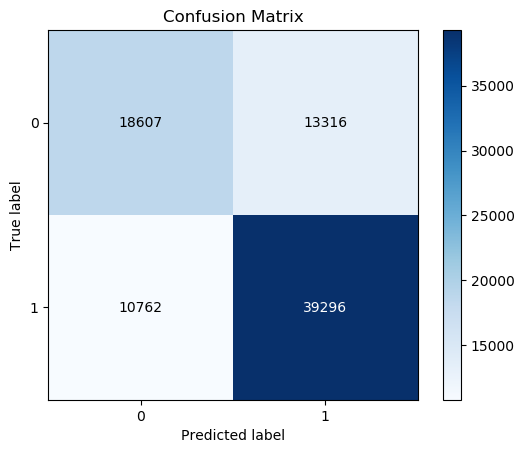

In [266]:
skplt.plot_confusion_matrix(y_test ,pred)

In [268]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.63      0.58      0.61     31923
          1       0.75      0.79      0.77     50058

avg / total       0.70      0.71      0.70     81981



In [261]:
import pickle
sclf_model='Stacking_undersample.sav'
pickle.dump(sclf,open(sclf_model,'wb'))

In [264]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(mlp, 'mlp_saved_model_undersampling.pkl') 

['mlp_saved_model_undersampling.pkl']

In [269]:
sclf.classifiers

[BernoulliNB(alpha=10, binarize=0.0, class_prior=[0.52, 0.48], fit_prior=True),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
        learning_rate_init=0.001, max_iter=1000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight={0: 0.55, 1: 0.45},
             criterion='gini', max_depth=None, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=75, n_jobs=-1, oob_score=False, random_state=25,
             verbose=0, warm_start=False)]

In [12]:
result.head(4)

,AGENT_REPRESENTING_EMPLOYER,CASE_STATUS,EMPLOYER_CITY,EMPLOYER_NAME,EMPLOYER_STATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,SOC_NAME,VISA_CLASS
0,1,0,RIVERWOODS,DISCOVER_PRODUCTS_INC,IL,Y,1,ASSOCIATE_DATA_INTEGRATION,COMPUTER_SYSTEMS_ANALYSTS,H1B
1,1,0,RIVERWOODS,DFS_SERVICES_LLC,IL,Y,1,SENIOR_ASSOCIATE,OPERATIONS_RESEARCH_ANALYSTS,H1B
2,1,0,WASHINGTON,EASTBANC_TECHNOLOGIES_LLC,DC,Y,1,NET_SOFTWARE_PROGRAMMER,COMPUTER_PROGRAMMERS,H1B
3,0,0,LIVONIA,INFO_SERVICES_LLC,MI,Y,0,PROJECT_MANAGER,COMPUTER_OCCUPATIONS_ALL_OTHER,H1B
